### Sales Analysis for  April 2019

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

### Import data

In [2]:
April=pd.read_csv('/Users/tolumide/Downloads/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_April_2019.csv')
April.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [3]:
April.shape

(18383, 6)

In [4]:
April.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18383 entries, 0 to 18382
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          18324 non-null  object
 1   Product           18324 non-null  object
 2   Quantity Ordered  18324 non-null  object
 3   Price Each        18324 non-null  object
 4   Order Date        18324 non-null  object
 5   Purchase Address  18324 non-null  object
dtypes: object(6)
memory usage: 861.8+ KB


### Questions
1. What was the highest sales made in the month and which day was it?
2. Which city and product had the highest sales?
3. At what time of the day should the product be displayed?
4. Which of the product are complementary goods?

### Clean up data

#### Drop all rows of NAN 

In [5]:
nan_April= April[April.isna().any(axis=1)]
nan_April.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
April=April.dropna()
April.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### Drop 'er'

In [11]:
April=April[April['Order_Day']!= 'er']
April.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order_Day
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",19
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",07
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",12
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",12
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",30


#### Convert column to their correct form

In [13]:
April['Quantity Ordered']=pd.to_numeric(April['Quantity Ordered'])
April['Price Each']=pd.to_numeric(April['Price Each'])
April.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order_Day
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",19
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",7
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",12
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",12
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",30


### Adding new columns

#### Add order day column

In [12]:
April['Order_Day']=April['Order Date'].str[3:5]
April['Order_Day']=April['Order_Day'].astype('int32')
April.head()

<ipython-input-12-a0e7a91288fd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  April['Order_Day']=April['Order Date'].str[3:5]
<ipython-input-12-a0e7a91288fd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  April['Order_Day']=April['Order_Day'].astype('int32')


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order_Day
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",19
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",7
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",12
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",12
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",30


#### Add sales column

In [14]:
April['Sales']=April['Quantity Ordered'].astype('int')*April['Price Each'].astype('float')
April.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order_Day,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",19,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",7,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",12,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",12,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",30,11.99


#### Add a City column

In [15]:
# using the .apply() method
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

April['City']=April['Purchase Address'].apply(lambda x: f'{get_city(x)} ({get_state(x)})')
April.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order_Day,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",19,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",7,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",12,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",12,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",30,11.99,Los Angeles (CA)


### 1.What was the highest sales made in the month and which day was it?

In [16]:
result=April.groupby('Order_Day').sum()
result.head()

,Quantity Ordered,Price Each,Sales
Order_Day,,,
1,702,117390.61,118086.63
2,663,103580.85,104496.71
3,685,112446.54,113611.75
4,710,115737.15,116214.99
5,675,113545.28,114012.88


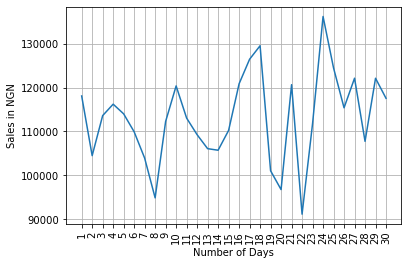

In [17]:
Order_Day= range(1,31)
plt.plot(Order_Day,result["Sales"])
plt.xticks(Order_Day, rotation='vertical')
plt.ylabel("Sales in NGN")
plt.xlabel("Number of Days")
plt.grid()
plt.show()

The highest sales made in April was that of 24th, with a balance of 136177.32. 

Purchase was at its lowest on 22nd and 8th

The increase in sales of this product might have been as a result of change in price, obviously, reduction in price (low price) that stimulate high demand.

### 2.Which city and product had the highest sales?

In [18]:
results=April.groupby('City').sum()
results

,Quantity Ordered,Price Each,Order_Day,Sales
City,,,,
Atlanta (GA),1633,282879.88,22562,284454.92
Austin (TX),1092,171487.65,15200,172683.59
Boston (MA),2190,351742.75,29464,353880.16
Dallas (TX),1519,251689.04,21176,252840.47
Los Angeles (CA),3399,547991.02,47225,551399.07
New York City (NY),2741,442392.68,37462,446587.78
Portland (ME),265,42370.29,3780,42536.49
Portland (OR),1134,197722.63,15580,198591.62
San Francisco (CA),4987,810338.31,68126,817074.77


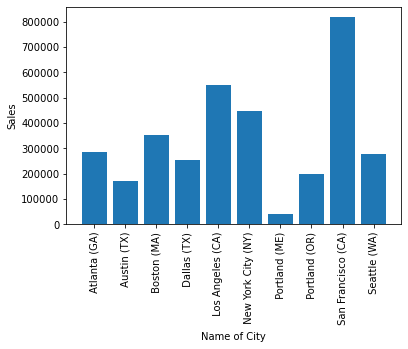

In [19]:
cities=[city for city,df in April.groupby('City')]
plt.bar(cities,results['Sales'])
plt.xticks(cities, rotation='vertical')
plt.ylabel('Sales')
plt.xlabel('Name of City')
plt.show()

The City with the highest sales was San Francisco(CA). 

Portland sells less of this product during April and this can be traced to low awearness of the product in the city.

The reason for the agument sales might have been increased advertisement of the product in the city, presence of consumers that enjoy the consumption of the product are situated  in the City.

#### Product in high demand

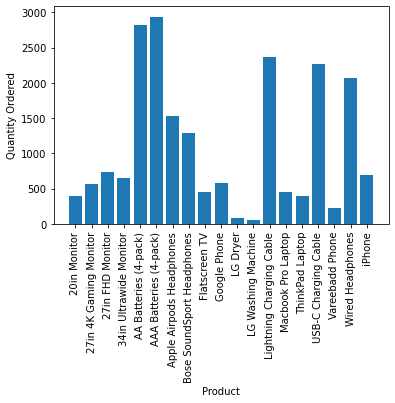

In [20]:
april_product=April.groupby('Product')
quantity_ordered=april_product.sum()['Quantity Ordered']


products=[product for product, df in april_product]

plt.bar(products,quantity_ordered)
plt.xticks(products, rotation='vertical',size=10)
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.show()

The most demanding product for April are AAA Batteries,lightig charging cable,USB-C Charging cable,wired headphones.

Reason  why these product might have been demanded at augment rate is because of its functionality and essentiality  in humans daily activity and the price (affordable).

To check the reason for the high demand in each product,comparing the price;

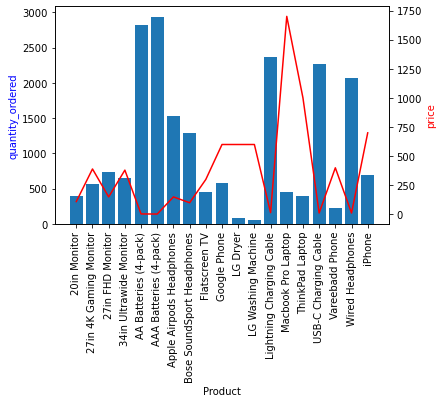

In [24]:
price=April.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered)
ax2.plot(products, price, 'r-')

ax1.set_xlabel('Product')
ax1.set_ylabel('quantity_ordered',color='b')
ax2.set_ylabel('price', color='r')
ax1.set_xticklabels(products, rotation='vertical')
plt.show()

There is a correlation between price and quantity dd. 

Law of demand principle show forth here; the lower the price, the higher the quantity demanded and the higher the price , the lower the quantity demanded. 

### 3.At what time of the day should the product be displayed?

First, we parse the date in a date format to get the hour and minutes

In [30]:
April['Hour'] = pd.to_datetime(April['Order Date']).dt.hour
April['Minute'] = pd.to_datetime(April['Order Date']).dt.minute
April.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order_Day,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",19,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",7,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",12,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",12,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",30,11.99,Los Angeles (CA),9,27


In [33]:
hour=April.groupby('Hour').sum()
hour.head()

,Quantity Ordered,Price Each,Order_Day,Sales,Minute
Hour,,,,,
0,442,74031.52,5527,74329.16,10047
1,276,47691.01,3991,48011.05,6864
2,145,22313.75,1897,22384.20,3239
3,93,19503.98,1353,19552.22,2088
4,93,18558.79,1280,18628.47,2658


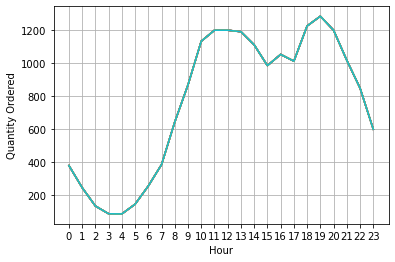

In [34]:
hour=[hour for hour, df in April.groupby('Hour')]
plt.plot(hour, April.groupby(['Hour']).count())

plt.xticks(hour)
plt.ylabel('Quantity Ordered')
plt.xlabel('Hour')
plt.grid()
plt.show()

11am or before 7pm, the product can be displayed.

Therefore, the company is advised to carry out their activities during this hours of the day so as to maximise sales as well as profit.

 ### 4.Which of the product are sold together?

In [35]:
df=April[April['Order ID'].duplicated(keep=False)]

df['Grouped']= April.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

df= df[['Order ID','Grouped']].drop_duplicates()

df.head()

<ipython-input-35-6a077ca68370>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped']= April.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


Counting unique pairs

In [36]:
from itertools import combinations
from collections import Counter


count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
for key,value in count.most_common(5):
    print(key,value)

('Google Phone', 'USB-C Charging Cable') 106
('iPhone', 'Lightning Charging Cable') 106
('iPhone', 'Wired Headphones') 43
('Google Phone', 'Wired Headphones') 41
('iPhone', 'Apple Airpods Headphones') 37


Predicting the dataframe;

Promoting advert or awearness of product in cities where sales are low, will help improve sales.

If the store start opening from 11am to 1pm and 6pm to 8pm, the store will make more sales.